<a href="https://colab.research.google.com/github/Vanderval31bs/reducao-dimensionalidade-dio/blob/main/reducao_dimensionalidade_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This nootebok has the purpose of implementing a dimensionality reduction algorithm for images. The ideia is to turn the colored image into a gray-scaled image and a binary (black and white) image.

We start by import some important packages


In [85]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

Lets define a function that get us a image from a specific path and converts to array, and another one that plots the image

In [94]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    img = image.img_to_array(img)
    return img

def plot_image(img_array, grayscale):
    img = image.array_to_img(img_array)
    if (grayscale):
      plt.imshow(img, cmap=plt.get_cmap('gray'))
    else:
      plt.imshow(img)
    plt.show()

We will first work with the classical Lenna image. Lets start off by plotting it

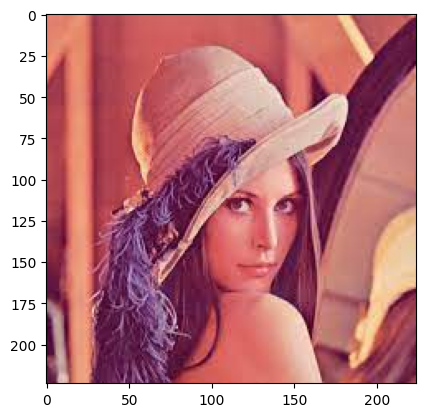

In [97]:
lena = get_image("/lena.jpg")
plot_image(lena, False)

Lets see the shape of the image array

In [98]:
lena.shape

(224, 224, 3)

As you can see, the image consists of 224 times 224 pixels, each pixel consisting of an array of three values, which represent the values of red (R), blue (B) and green (G) in a scale from 0 to 255.

Lets now define a function that converts such an image into a gray one

In [99]:
def rgb_to_gray(image):
  gray_image = []
  for i in range (image.shape[0]):
    gray_row = []
    for j in range (image.shape[1]):
      gray_val = [image[i][j][0] * 0.299 + image[i][j][1] * 0.587 + image[i][j][2] * 0.114] # Reference: https://support.ptc.com/help/mathcad/r9.0/en/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html#:~:text=The%20RGB%20values%20are%20converted,%2C%20green%2C%20and%20blue%20light.
      gray_row.append(gray_val)
    gray_image.append(gray_row)

  gray_image = np.array(gray_image)
  return gray_image

Lets now compute gray lena and see it:

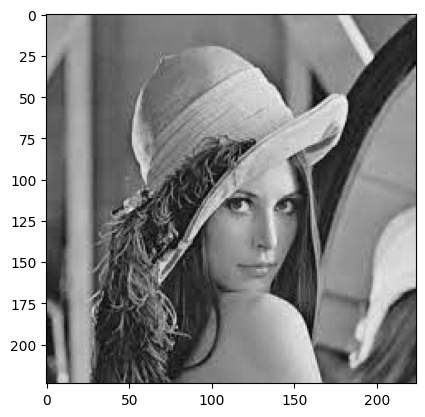

In [100]:
gray_lena = rgb_to_gray(lena)
# gray_lena_image = image.array_to_img(gray_lena)
# plt.imshow(gray_lena_image, cmap=plt.get_cmap('gray'))
# plt.show()
plot_image(gray_lena, True)

Now we define a function that converts and rgb image to a binary one

In [101]:
def rgb_to_binary(image):
  gray_image = rgb_to_gray(image)
  binary_image = np.where(gray_image/255 > 0.5, 1, 0) # We normalize by dividing it by 255
  return binary_image

We then try to apply it to Lenna image

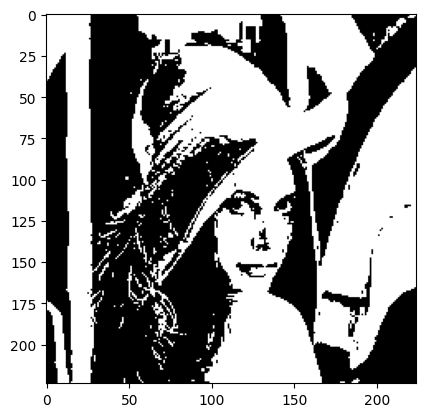

In [103]:
binary_lena = rgb_to_binary(lena)
plot_image(binary_lena, True)

So our job is done, lets now just check the functions that we made in other images

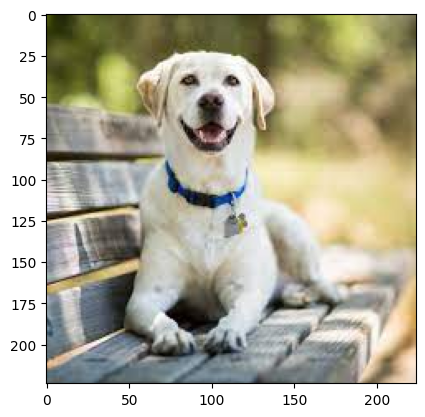

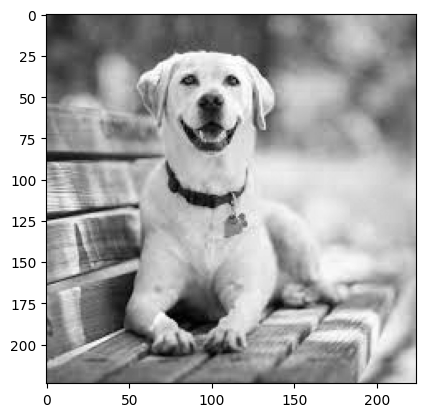

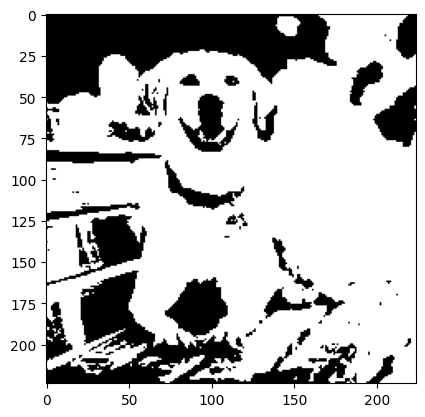

In [105]:
dog = get_image("/happy_dog.jpg")
gray_dog = rgb_to_gray(dog)
binary_dog = rgb_to_binary(dog)
plot_image(dog, False)
plot_image(gray_dog, True)
plot_image(binary_dog, True)

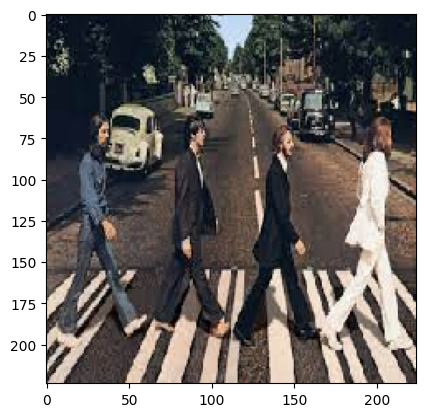

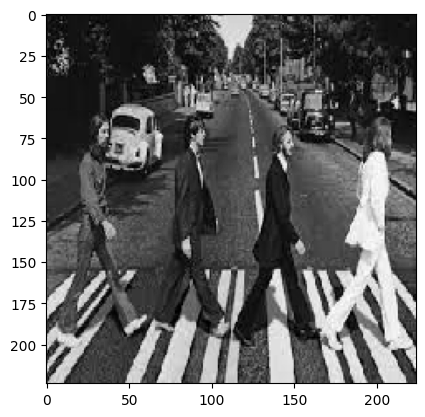

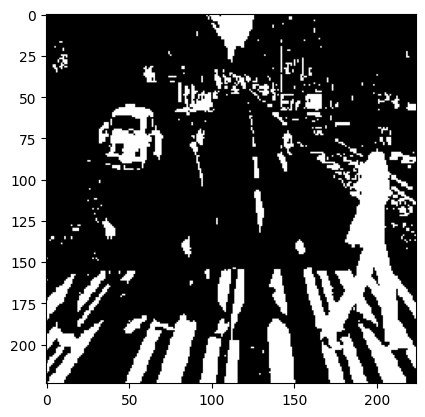

In [107]:
beatles = get_image("/beatles.jpg")
gray_beatles = rgb_to_gray(beatles)
binary_beatles = rgb_to_binary(beatles)
plot_image(beatles, False)
plot_image(gray_beatles, True)
plot_image(binary_beatles, True)